<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install dependencies


In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
!kaggle --version

Kaggle API 1.5.4


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 52.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 8.95MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 62.4MB/s]


To predict “what sorts of people were more likely to survive?” 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

In [0]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

Data Dictionary
Variable =	Definition	Key

survival = 	Survival	0 = No, 1 = Yes

pclass = 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex = 	Sex	
Age =	Age in years	
sibsp = 	# of siblings / spouses aboard the Titanic	
parch = 	# of parents / children aboard the Titanic	
ticket = 	Ticket number	
fare = 	Passenger fare	
cabin = 	Cabin number	
embarked = 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.shape

(891, 12)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train['Survived'].unique()

array([3, 1, 2])

In [0]:
train['Pclass'].unique()

array([3, 1, 2])

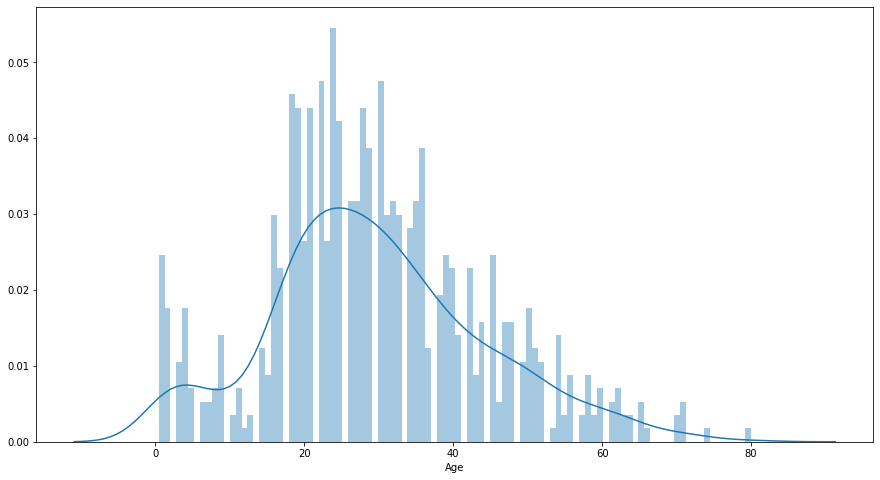

In [0]:
plt.figure(figsize=(15,8))
sns.distplot(train['Age'], bins= 100)

Fill maen value in empty Age row

In [0]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


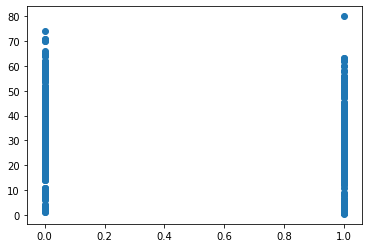

In [0]:
plt.scatter(train['Survived'], train['Age'])

In [0]:
female_survived = train.loc[train.Sex == 'female']['Survived']
print(sum(female_survived))

233


In [47]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
